In [ ]:
!pip install kaggle

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gayatriv369","key":"9dcc9131f116bd26640246ea8813c3e0"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jayaprakashpondy/soil-image-dataset

Dataset URL: https://www.kaggle.com/datasets/jayaprakashpondy/soil-image-dataset
License(s): unknown
100% 144M/144M [00:00<00:00, 171MB/s]
100% 144M/144M [00:00<00:00, 152MB/s]


In [ ]:
!ls /content

'kaggle (1).json'   sample_data   soil-image-dataset.zip


In [ ]:
!unzip /content/soil-image-dataset.zip -d /content/

Archive:  /content/soil-image-dataset.zip
  inflating: /content/Dataset/Train/Alluvial soil/01060602previewen-02b.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/01060602previewen-02d.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/1000_F_240425429_YL91trtDxXQl8L0OKP7zyngeSb63olAC.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial-Soil..png  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial-soil-distribution-in-India-1.jpeg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial-soil-distribution-in-India.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial_1.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial_10.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial_11.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial_12 - Copy.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial_12.jpg  
  inflating: /content/Dataset/Train/Alluvial soil/Alluvial_13.jpg  
  inflating: /content/Da

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    '/content/Dataset/Train',
    target_size=(150, 150),  # Resizing images
    batch_size=32,
    class_mode='categorical'  # Since it's multi-class classification
)


Found 1214 images belonging to 4 classes.


In [ ]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 classes for each soil type

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5448 - loss: 1.0755
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - accuracy: 0.8438 - loss: 0.4794
Epoch 3/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.7580 - loss: 0.5063
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 334us/step - accuracy: 0.8750 - loss: 0.2693
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8204 - loss: 0.3964
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 489us/step - accuracy: 0.7812 - loss: 0.3781
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8124 - loss: 0.4091
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - accuracy: 0.8438 - loss: 0.2940
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8806 - loss: 0.3003
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 403us/step - accuracy: 0.9062 - loss: 0.3003
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8488 - loss: 0.3390
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 393us/step - accuracy: 0.7812 - loss: 0.4295
Epoch 13/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.8746 - loss: 0.2991
Epoch 14/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 458us/step - accuracy: 0.8750 

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/Dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model
score = model.evaluate(validation_generator)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')



Found 339 images belonging to 4 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 468ms/step - accuracy: 0.9244 - loss: 0.2192
Test loss: 0.24341896176338196 / Test accuracy: 0.9203540086746216


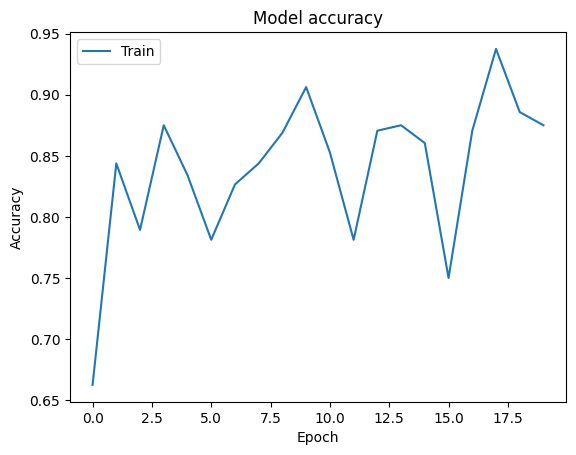

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


In [ ]:
# Save the model
model.save('soil_model.h5')


In [ ]:
# Load the trained model (assuming you've saved it as 'soil_model.h5')
model = keras.models.load_model('soil_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/demo2.png'
# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Ensure same size as training images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Scale the image as you did with your training images
    return img_array


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,718 (72.62 MB)

 Trainable params: 19,035,716 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
#Using mulund mithagar creek image
# Example path to the new image
img_path = '/content/mulund1.png'

# Preprocess the image
processed_image = preprocess_image(img_path)

# Make the prediction
predictions = model.predict(processed_image)

# Output the predicted class
predicted_class = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [ ]:
print(processed_image.shape)


(1, 150, 150, 3)


In [ ]:

class_names = ['Alluvial soil', 'Black Soil', 'Clay soil', 'Red soil']

predicted_class_index = np.argmax(predictions[0])  # Get the class index
predicted_class_name = class_names[predicted_class_index]

print(f'Predicted class: {predicted_class_name}')


Predicted class: Alluvial soil


In [ ]:
from google.colab import files

# Download the model file
files.download('soil_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>